<a href="https://colab.research.google.com/github/saloniwalimbe/MF_Portfolio/blob/main/Copy_of_Conservative_v2_EF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import datetime
from urllib.request import urlopen
import csv
import warnings
warnings.filterwarnings('ignore')     #suppress unwanted warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
dailynav = 'https://raw.githubusercontent.com/saloniwalimbe/Mutual-Fund-Schemes/main/DailyNAV.csv'


f = urlopen(dailynav)
data = f.read()
data = data.decode('utf-8')
data = data.split('\n')

list_for_df = []
for line in data[1:]:
  row = line.split(',')
  if row != '':
    list_for_df.append(row)

df = pd.DataFrame(list_for_df, columns= ['NAV_Date',
                                         'Axis_Equity','CanaraRobeco_Bluechip','Franklin_Bluechip','ICICI_FocusedEq','Kotak_Bluechip','Kotak_Flexicap','SBI_Bluechip','SBI_FocusedEq',
                                         'AdityaBirla_EqHybrid','Franklin_EqHybrid','HDFC_EqHybrid','SBI_EqHybrid',
                                         'Kotak_EqArbitrage','SBI_Arbitrage','LIC_Bond','LIC_DebtHybrid'
                                        ]
                 )


df['NAV_Date'] = pd.to_datetime(df['NAV_Date'], infer_datetime_format=True)
df['Axis_Equity'] = pd.to_numeric(df['Axis_Equity'])
df['CanaraRobeco_Bluechip'] = pd.to_numeric(df['CanaraRobeco_Bluechip'])
df['Franklin_Bluechip'] = pd.to_numeric(df['Franklin_Bluechip'])
df['ICICI_FocusedEq'] = pd.to_numeric(df['ICICI_FocusedEq'])
df['Kotak_Bluechip'] = pd.to_numeric(df['Kotak_Bluechip'])
df['Kotak_Flexicap'] = pd.to_numeric(df['Kotak_Flexicap'])
df['SBI_Bluechip'] = pd.to_numeric(df['SBI_Bluechip'], errors = "ignore")
df['SBI_FocusedEq'] = pd.to_numeric(df['SBI_FocusedEq'], errors = "ignore")
df['AdityaBirla_EqHybrid'] = pd.to_numeric(df['AdityaBirla_EqHybrid'], errors = "ignore")
df['Franklin_EqHybrid'] = pd.to_numeric(df['Franklin_EqHybrid'], errors = "ignore")
df['HDFC_EqHybrid'] = pd.to_numeric(df['HDFC_EqHybrid'], errors = "ignore")
df['SBI_EqHybrid'] = pd.to_numeric(df['SBI_EqHybrid'], errors = "ignore")
df['Kotak_EqArbitrage'] = pd.to_numeric(df['Kotak_EqArbitrage'], errors = "ignore")
df['SBI_Arbitrage'] = pd.to_numeric(df['SBI_Arbitrage'], errors = "ignore")
df['LIC_Bond'] = pd.to_numeric(df['LIC_Bond'], errors = "ignore")
df['LIC_DebtHybrid'] = pd.to_numeric(df['LIC_DebtHybrid'], errors = "ignore")


df = df.set_index('NAV_Date')

df = df.dropna()



##Constructing a Conservative Risk Portfolio

In [ ]:
cons = df.T.iloc[[8,9,12,13,14,15]]
cons = cons.T
cons

,AdityaBirla_EqHybrid,Franklin_EqHybrid,Kotak_EqArbitrage,SBI_Arbitrage,LIC_Bond,LIC_DebtHybrid
NAV_Date,,,,,,
2013-01-01,348.92,55.1533,16.9361,15.6467,32.2502,35.2934
2013-01-02,350.97,55.2697,16.9652,15.6730,32.2678,35.3290
2013-01-03,352.69,55.5012,16.9610,15.6752,32.2970,35.3497
2013-01-04,353.10,55.5513,16.9658,15.6725,32.3296,35.3660
2013-01-07,352.50,55.6576,16.9742,15.6829,32.3619,35.3826
...,...,...,...,...,...,...
2022-12-22,1030.20,180.8508,31.2420,28.1987,59.5256,68.6033
2022-12-23,1042.56,182.9713,31.2474,28.2203,59.5629,68.3683
2022-12-26,1048.33,183.7410,31.2668,28.2418,59.5702,68.5005


In [ ]:
def generate_random_weights(n, N): # random weights
    Wgt =[]#  [n*[0] for i in range(N)]
    w = n*[3]
    for i in range(N):
        while(not all([x >0.02 and x<0.21 for x in w])):  #weights should not be more that 21% for one fund in a portfolio
            w = [random.uniform(0.02, 1) for _ in  range(n)]  #range - no weight should be zero
            w = [wi/sum(w) for wi in w]
        Wgt.append(w)
        w = n*[3]
    return(Wgt)

In [ ]:
w = [0.1666,0.1666,0.1666,0.1666,0.1666,0.1666] #assigning equal weights initially
#random.seed(3)
Wgts = np.matrix(generate_random_weights(n=6, N=10000))  #10000 portfolios

In [ ]:
weights_total = np.zeros((len(Wgts),6))
returns = np.zeros(len(Wgts),)
volatility = np.zeros(len(Wgts),)
sharpe = np.zeros(len(Wgts),)

In [ ]:
#Calculating log returns
log_returns = np.log(cons/cons.shift(1))
log_returns = log_returns.dropna()

In [ ]:
#Calculating log returns covariance
log_returns.cov()

,AdityaBirla_EqHybrid,Franklin_EqHybrid,Kotak_EqArbitrage,SBI_Arbitrage,LIC_Bond,LIC_DebtHybrid
AdityaBirla_EqHybrid,6.333504e-05,5.579311e-05,7.567985e-07,-2.797623e-07,1.783567e-08,9.699574e-07
Franklin_EqHybrid,5.579311e-05,5.548339e-05,7.229685e-07,-2.556575e-07,6.496316e-08,9.522433e-07
Kotak_EqArbitrage,7.567985e-07,7.229685e-07,4.062188e-07,-1.595706e-08,5.333126e-09,4.769185e-08
SBI_Arbitrage,-2.797623e-07,-2.556575e-07,-1.595706e-08,4.664843e-07,3.342388e-08,-2.726217e-07
LIC_Bond,1.783567e-08,6.496316e-08,5.333126e-09,3.342388e-08,3.910250e-06,1.541032e-06
LIC_DebtHybrid,9.699574e-07,9.522433e-07,4.769185e-08,-2.726217e-07,1.541032e-06,5.660489e-06


In [ ]:
for i in range(len(Wgts)):
    weights_total[i,:]=Wgts[i]
    returns[i] = np.sum((log_returns.mean()* weights_total[i]) * 246)
    volatility[i] = np.sqrt(np.dot(weights_total[i].T,np.dot(log_returns.cov()*246,weights_total[i])))
    sharpe[i] = (returns[i]-.06)/volatility[i]

In [ ]:
print('Maximum Sharpe Ratio is',sharpe.max())
print('\n')
print('Max sharpe index is',sharpe.argmax())
print('\n')
print('The weights alloted respectively are','\n',weights_total[sharpe.argmax(),:])
print('\n')
print('Returns =',returns[sharpe.argmax()])
print('\n')
print('Risk =',volatility[sharpe.argmax()])

Maximum Sharpe Ratio is 0.5174648491301753


Max sharpe index is 4325


The weights alloted respectively are 
 [0.02911771 0.20851446 0.19370818 0.19885    0.16001466 0.20979499]


Returns = 0.07572611722157566


Risk = 0.030390696581633004


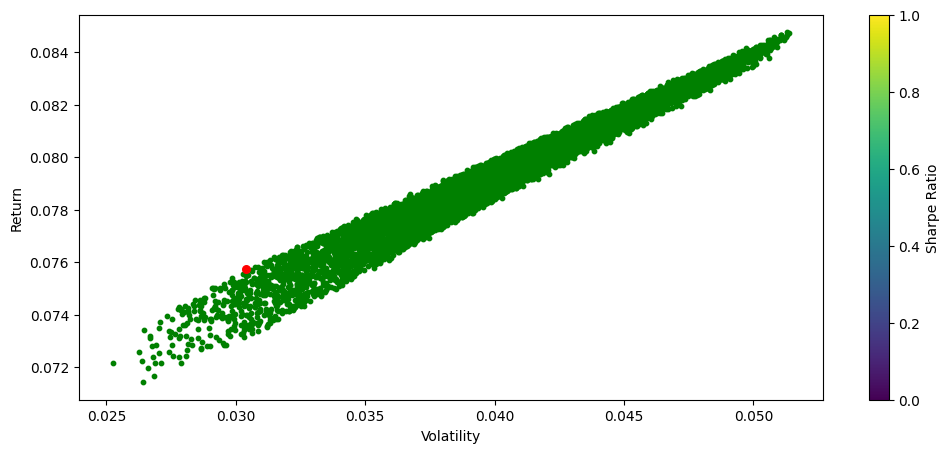

In [ ]:
plt.figure(figsize=(12,5))
plt.scatter(volatility,returns,c='green',s=10)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(volatility[sharpe.argmax()],returns[sharpe.argmax()],c='red',s=30)

In [ ]:
nav_pred = 'https://raw.githubusercontent.com/saloniwalimbe/Mutual-Fund-Schemes/main/NAV_Prediction%20v1.csv'

In [ ]:

f1 = urlopen(nav_pred)
data1 = f1.read()
data1 = data1.decode('utf-8')
data1 = data1.split('\n')

list_for_df1 = []
for line in data1[1:]:
  row = line.split(',')
  if row != '':
    list_for_df1.append(row)

df1 = pd.DataFrame(list_for_df1, columns= ['Axis_Equity','CanaraRobeco_Bluechip','Franklin_Bluechip','ICICI_FocusedEq','Kotak_Bluechip','Kotak_Flexicap','SBI_Bluechip','SBI_FocusedEq',
                                         'AdityaBirla_EqHybrid','Franklin_EqHybrid','HDFC_EqHybrid','SBI_EqHybrid',
                                         'Kotak_EqArbitrage','SBI_Arbitrage','LIC_Bond','LIC_DebtHybrid'
                                        ]
                 )


df1['Axis_Equity'] = pd.to_numeric(df1['Axis_Equity'])
df1['CanaraRobeco_Bluechip'] = pd.to_numeric(df1['CanaraRobeco_Bluechip'])
df1['Franklin_Bluechip'] = pd.to_numeric(df1['Franklin_Bluechip'])
df1['ICICI_FocusedEq'] = pd.to_numeric(df1['ICICI_FocusedEq'])
df1['Kotak_Bluechip'] = pd.to_numeric(df1['Kotak_Bluechip'])
df1['Kotak_Flexicap'] = pd.to_numeric(df1['Kotak_Flexicap'])
df1['SBI_Bluechip'] = pd.to_numeric(df1['SBI_Bluechip'], errors = "ignore")
df1['SBI_FocusedEq'] = pd.to_numeric(df1['SBI_FocusedEq'], errors = "ignore")
df1['AdityaBirla_EqHybrid'] = pd.to_numeric(df1['AdityaBirla_EqHybrid'], errors = "ignore")
df1['Franklin_EqHybrid'] = pd.to_numeric(df1['Franklin_EqHybrid'], errors = "ignore")
df1['HDFC_EqHybrid'] = pd.to_numeric(df1['HDFC_EqHybrid'], errors = "ignore")
df1['SBI_EqHybrid'] = pd.to_numeric(df1['SBI_EqHybrid'], errors = "ignore")
df1['Kotak_EqArbitrage'] = pd.to_numeric(df1['Kotak_EqArbitrage'], errors = "ignore")
df1['SBI_Arbitrage'] = pd.to_numeric(df1['SBI_Arbitrage'], errors = "ignore")
df1['LIC_Bond'] = pd.to_numeric(df1['LIC_Bond'], errors = "ignore")
df1['LIC_DebtHybrid'] = pd.to_numeric(df1['LIC_DebtHybrid'], errors = "ignore")


df1 = df1.dropna()



In [ ]:
from datetime import datetime, timedelta
dt = pd.to_datetime('2022-12-28')
td = []
for i in range(1,21):
  tdi = timedelta(days=i)
  td.append(dt+tdi)
  i=i+1

td = pd.to_datetime(td)
df1 = df1.set_index(td)

In [ ]:
total_nav = df.append(df1)
total_nav

,Axis_Equity,CanaraRobeco_Bluechip,Franklin_Bluechip,ICICI_FocusedEq,Kotak_Bluechip,Kotak_Flexicap,SBI_Bluechip,SBI_FocusedEq,AdityaBirla_EqHybrid,Franklin_EqHybrid,HDFC_EqHybrid,SBI_EqHybrid,Kotak_EqArbitrage,SBI_Arbitrage,LIC_Bond,LIC_DebtHybrid
2013-01-01,14.914900,12.020000,238.344400,15.200000,111.103000,13.381000,16.720000,61.460000,348.920000,55.153300,28.957000,56.720000,16.936100,15.646700,32.250200,35.293400
2013-01-02,15.025100,12.120000,239.481900,15.330000,111.730000,13.478000,16.820000,61.910000,350.970000,55.269700,29.227000,56.960000,16.965200,15.673000,32.267800,35.329000
2013-01-03,15.073200,12.140000,240.449500,15.390000,112.126000,13.483000,16.850000,62.490000,352.690000,55.501200,29.316000,57.580000,16.961000,15.675200,32.297000,35.349700
2013-01-04,15.069500,12.150000,240.885300,15.410000,112.697000,13.488000,16.870000,62.500000,353.100000,55.551300,29.381000,57.660000,16.965800,15.672500,32.329600,35.366000
2013-01-07,15.037000,12.110000,240.714100,15.350000,112.706000,13.464000,16.800000,62.360000,352.500000,55.657600,29.348000,57.710000,16.974200,15.682900,32.361900,35.382600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-13,64.390077,38.547795,704.526259,51.680222,374.471873,50.107760,57.903602,231.946044,1019.594223,176.636855,76.917838,206.291484,30.598392,27.757426,59.326608,66.954710
2023-01-14,64.331389,38.408609,704.707508,51.642988,374.014070,49.913351,57.695603,232.002073,1018.169093,176.323240,76.605898,206.203831,30.578893,27.743126,59.318766,66.894800
2023-01-15,64.273352,38.271216,704.886073,51.605899,373.559897,49.722368,57.491788,232.057388,1016.752879,176.012957,76.299609,206.116605,30.559625,27.728969,59.310993,66.835790
2023-01-16,64.215934,38.135575,705.062050,51.568954,373.109442,49.534772,57.292205,232.111720,1015.346112,175.705905,75.999102,206.029847,30.540609,27.714981,59.303301,66.777672


In [ ]:
total_cons = total_nav.T.iloc[[8,9,12,13,14,15]]
total_cons = total_cons.T
total_cons

,AdityaBirla_EqHybrid,Franklin_EqHybrid,Kotak_EqArbitrage,SBI_Arbitrage,LIC_Bond,LIC_DebtHybrid
2013-01-01,348.920000,55.153300,16.936100,15.646700,32.250200,35.293400
2013-01-02,350.970000,55.269700,16.965200,15.673000,32.267800,35.329000
2013-01-03,352.690000,55.501200,16.961000,15.675200,32.297000,35.349700
2013-01-04,353.100000,55.551300,16.965800,15.672500,32.329600,35.366000
2013-01-07,352.500000,55.657600,16.974200,15.682900,32.361900,35.382600
...,...,...,...,...,...,...
2023-01-13,1019.594223,176.636855,30.598392,27.757426,59.326608,66.954710
2023-01-14,1018.169093,176.323240,30.578893,27.743126,59.318766,66.894800
2023-01-15,1016.752879,176.012957,30.559625,27.728969,59.310993,66.835790
2023-01-16,1015.346112,175.705905,30.540609,27.714981,59.303301,66.777672


In [ ]:
#Calculating log returns
log_rtn_pred = np.log(total_cons/total_cons.shift(1))
log_rtn_pred = log_rtn_pred.dropna()

##Calculating Portfolio return, risk and sharpe ratio after including the newly predicted NAV values.

###Using the same weights as we got for the maximum sharpe


In [ ]:
allot_wt = weights_total[sharpe.argmax(),:]
allot_wt = np.array(allot_wt)
allot_wt

array([0.02911771, 0.20851446, 0.19370818, 0.19885   , 0.16001466,
       0.20979499])

In [ ]:
returns_pred = np.sum((log_rtn_pred.mean()*allot_wt)*246)
risk_pred = np.sqrt(np.dot(allot_wt.T,np.dot(log_rtn_pred.cov()*246, allot_wt)))
sharpe_pred = (returns_pred-0.06)/risk_pred

In [ ]:
print('Sharpe Ratio =',sharpe_pred)
print('\n')
print('Returns =',returns_pred)
print('\n')
print('Risk =',risk_pred)
print('\n')
print('Weights Allotted','\n')
for i in range(len(allot_wt)):
  print(total_cons.columns[i], '--->' ,allot_wt[i],'\n')


Sharpe Ratio = 0.4107162204268231


Returns = 0.07254333749857733


Risk = 0.03054015613394107


Weights Allotted 

AdityaBirla_EqHybrid ---> 0.029117707142696424 

Franklin_EqHybrid ---> 0.2085144624173191 

Kotak_EqArbitrage ---> 0.19370817641023064 

SBI_Arbitrage ---> 0.19884999952084034 

LIC_Bond ---> 0.16001466346594456 

LIC_DebtHybrid ---> 0.20979499104296884 

